In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [75]:
import seaborn as sns
sns.set_context('notebook')

In [2]:
all_x = np.array([201, 244, 47, 287, 203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146])
all_y = np.array([592, 401, 583, 402, 495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344])
all_sigma_y = np.array([61, 25, 38, 15, 21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22])
x = all_x
y = all_y
sigma_y = all_sigma_y

<Container object of 3 artists>

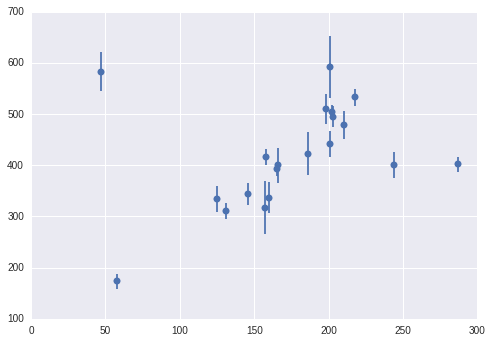

In [76]:
errorbar(x,y,yerr=sigma_y,linestyle='',marker='o')

In [5]:
import emcee

In [175]:
def loglike(params,x,y,sigma_y):
    m,b,Pb,Yb,lnVb = params
    Vb = np.exp(lnVb)
    model = m*x + b
    fg_term = (np.log((1-Pb)/np.sqrt(2*np.pi*sigma_y**2)) 
               - 0.5 * ((model-y)/sigma_y)**2)
    bg_term = (np.log(Pb/np.sqrt(2*np.pi*(Vb+sigma_y**2)))
              - 0.5 * (y - Yb)**2/(Vb+sigma_y**2))
    
    return np.sum(np.logaddexp(fg_term,bg_term))
def logprior(params):
    m,b,Pb,Yb,lnVb = params
    if ((-10 < m < 10) and (0 < b < 1000) and
        (0 < Pb < 1) and (0 < Yb < 1000)
        and (2< lnVb < 20)):
        return 0.0
    else:
        return -np.inf
def log_posterior(params,x,y,sigma_y):
    prior = logprior(params)
    if not np.isfinite(prior):
        return prior
    return prior + loglike(params,x,y,sigma_y)

In [118]:
np.log(10)

2.3025850929940459

In [184]:
initial_guess = np.array([1,0,0.,2,2])[None,:] + np.random.rand(32,5)*.1

In [185]:
sum([np.isfinite(logprior(initial_guess[k])) for k in range(32)])

32

In [186]:
sampler = emcee.EnsembleSampler(32,5,log_posterior,args=(x,y,sigma_y))

In [187]:
pos = sampler.run_mcmc(initial_guess,2000)

In [54]:
sampler.chain.shape

(32, 1000, 5)

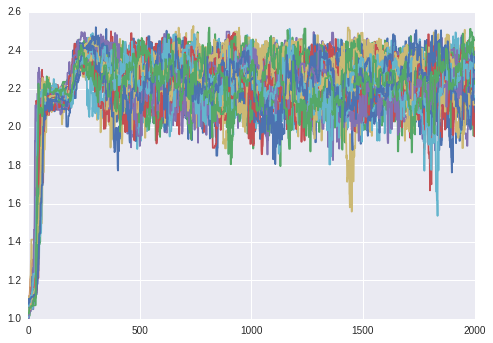

In [188]:
blah = plot(sampler.chain[:,:,0].T)

In [189]:
samples = sampler.chain[:, 1500:, :]

In [59]:
import corner

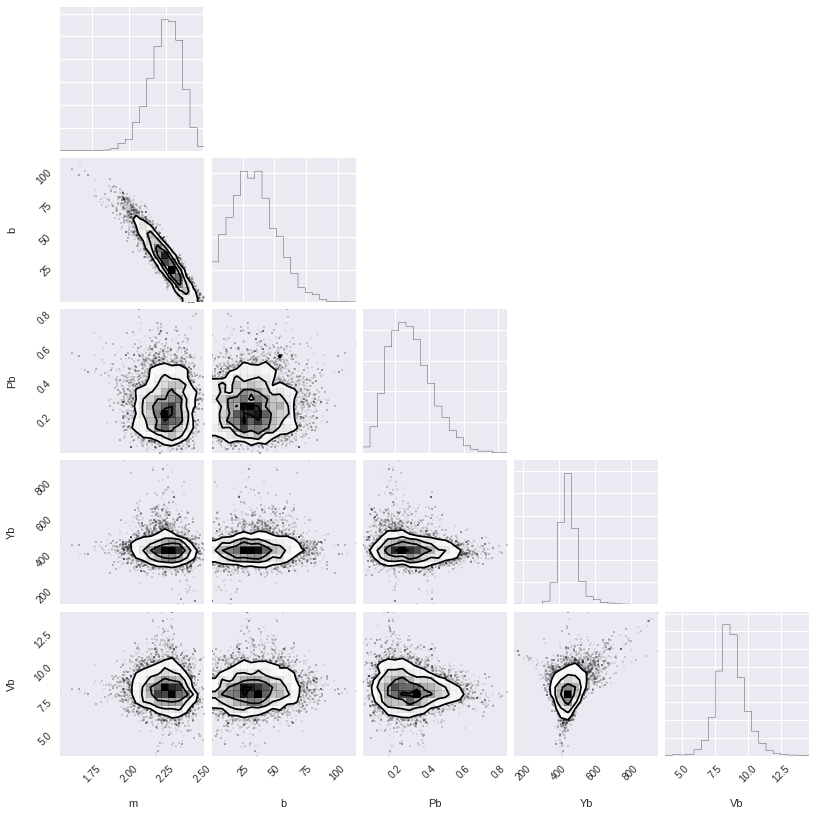

In [190]:
blah = corner.corner(samples.reshape((-1,5)),
                    labels = ['m','b','Pb','Yb','Vb'])

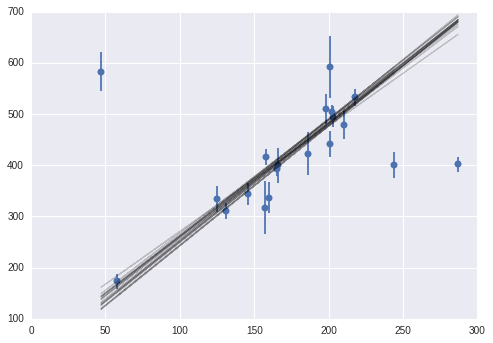

In [192]:
errorbar(x,y,yerr=sigma_y,linestyle='',marker='o')

for m,b,_,_,_ in samples[0,np.random.randint(samples.shape[1],size=16)]:
    plot(x,m*x+b,color='k',lw=1,alpha=.2)

#plot(x,X[1]*x+X[0])
#mll,bll = samples.mean(0).mean(0)
#plot(x,x*mll+bll,'r--')